In [1]:
import pygmt
import xarray as xr
import yaml
import numpy as np

In [27]:
with open("gmt_config.yml", "r") as ymlfile:
    cfg = yaml.safe_load(ymlfile)

In [28]:
grid = '../../bathymetry/moriches.nc'
grd = pygmt.grdclip(grid=grid, below=[0.0, -50])

psconvert [INFORMATION]: Processing /home/catherinej/.gmt/sessions/gmt_session.309947/gmt_34.ps-...
psconvert [INFORMATION]: Find HiResBoundingBox ...
psconvert [INFORMATION]: Figure dimensions: Width: 1028.07 points [36.268 cm]  Height: 649.998 points [22.9305 cm]
psconvert [INFORMATION]: [2827.06 2858.09 3855.13 3508.09]...
psconvert [INFORMATION]: An unknown psconvert setting was found but since image coordinates seem to be geographical, a linear transformation will be used.
psconvert [INFORMATION]: Convert to PNG...


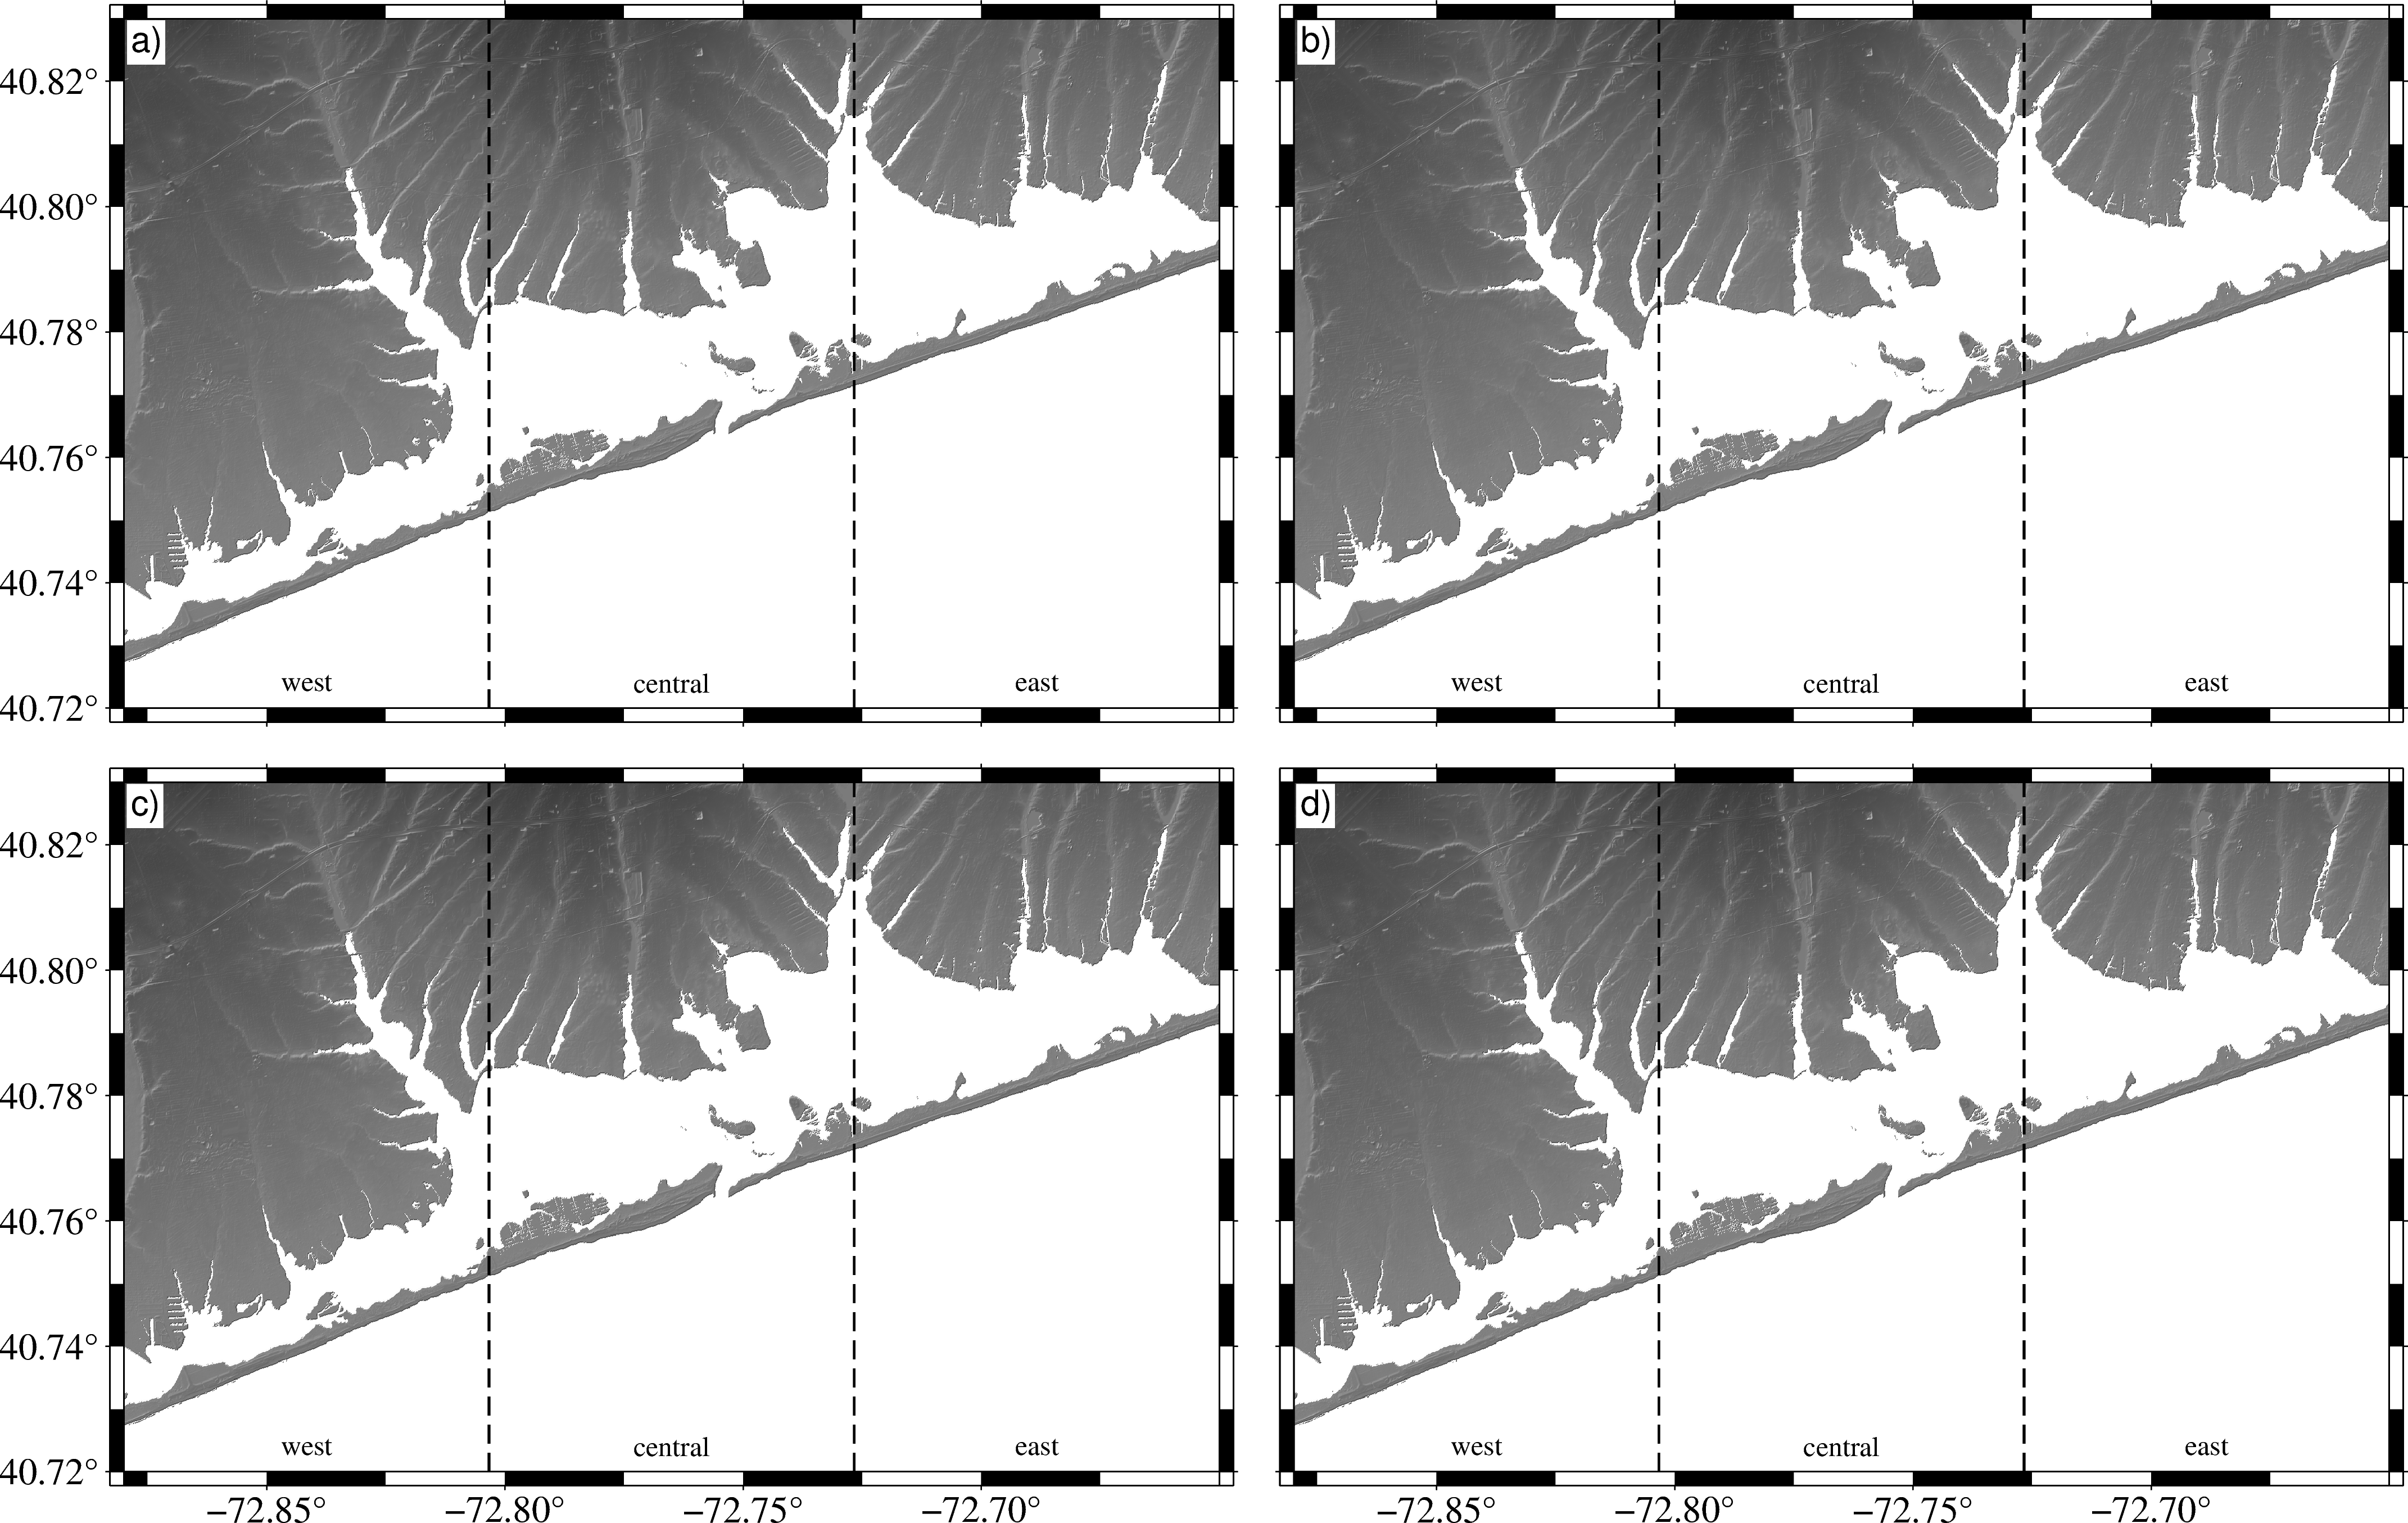

In [43]:
fig = pygmt.Figure()
region = cfg['moriches_map']['region']
frame_params = cfg['moriches_map']['basemap_frame']
with (pygmt.config(**cfg['region_map'])):
    with fig.subplot(
        nrows=2,
        subsize='16.5c',
        frame = frame_params,
        sharex='b',
        sharey='l',
        ncols = 2,
        region=region,
        projection='M16.5c',
        autolabel='+gwhite'):
        with (pygmt.config(**cfg['region_map'])):
            for i in range(4):
                with fig.set_panel(panel=i):
                    pygmt.makecpt(cmap='gray', series=[-50, 50], reverse=True)
                    fig.grdimage(region=region,grid=grd, cmap=True, shading=True, projection='M?')
                    third = 0.07663580247030193
                    west = -72.87995371851132 + third
                    east = -72.65004631110041 - third
                    west_x = np.linspace(west, west, 20)
                    y = np.linspace(region[2], region[3], 20)
                    east_x = np.linspace(east, east, 20)
                    with pygmt.config(FONT_ANNOT_PRIMARY='12p'):
                        fig.text(x=west-(third/2), y=40.724, text='west', font='black')
                        fig.text(x=east - (third/2), y=40.724, text='central', font='black')
                        fig.text(x=east+(third/2), y=40.724, text='east', font='black')
                    fig.plot(x=west_x, y=y, pen='1p,black,-')
                    fig.plot(x=east_x, y=y, pen='1p,black,-')

fig.show(verbose='i')
    
    